In [3]:
import pandas as pd 
import numpy as np
import os
import csv

In [6]:
data_filename = 'https://raw.githubusercontent.com/neowalter/DA-tour/master/charpter2/ionosphere.data'
df = pd.read_csv(data_filename)
df.describe

<bound method NDFrame.describe of      1  0  0.99539  -0.05889  0.85243  ...  0.42267  -0.54487  0.18641  -0.45300  g
0    1  0  1.00000  -0.18829  0.93035  ... -0.16626  -0.06288 -0.13738  -0.02447  b
1    1  0  1.00000  -0.03365  1.00000  ...  0.60436  -0.24180  0.56045  -0.38238  g
2    1  0  1.00000  -0.45161  1.00000  ...  0.25682   1.00000 -0.32382   1.00000  b
3    1  0  1.00000  -0.02401  0.94140  ... -0.05707  -0.59573 -0.04608  -0.65697  g
4    1  0  0.02337  -0.00592 -0.09924  ...  0.00000   0.00000 -0.00039   0.12011  b
..  .. ..      ...       ...      ...  ...      ...       ...      ...       ... ..
345  1  0  0.83508   0.08298  0.73739  ...  0.86660  -0.10714  0.90546  -0.04307  g
346  1  0  0.95113   0.00419  0.95183  ...  0.94066  -0.00035  0.91483   0.04712  g
347  1  0  0.94701  -0.00034  0.93207  ...  0.92459   0.00442  0.92697  -0.00577  g
348  1  0  0.90608  -0.01657  0.98122  ...  0.96022  -0.03757  0.87403  -0.16243  g
349  1  0  0.84710   0.13533  0.73638  ...

In [25]:
#change this to the location where your file is located
data_filename = "/content/ionosphere.data"
print(data_filename)

/content/ionosphere.data


In [26]:
X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i, row in enumerate(reader):
        # Get the data, converting each item to a float
        data = [float(datum) for datum in row[:-1]]
        # Set the appropriate row in our dataset
        X[i] = data
        # 1 if the class is 'g', 0 otherwise
        y[i] = row[-1] == 'g'

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)
print("There are {} samples in the training dataset".format(X_train.shape[0]))
print("There are {} samples in the testing dataset".format(X_test.shape[0]))
print("Each sample has {} features".format(X_train.shape[1]))

There are 263 samples in the training dataset
There are 88 samples in the testing dataset
Each sample has 34 features


In [28]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()

In [29]:
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
y_predicted = estimator.predict(X_test)
accuracy = np.mean(y_test == y_predicted) * 100
print("The accuracy is {0:.1f}%".format(accuracy))

The accuracy is 86.4%


In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The average accuracy is 82.6%


In [33]:
avg_scores = []
all_scores = []
parameter_values = list(range(1, 91))  

In [35]:
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

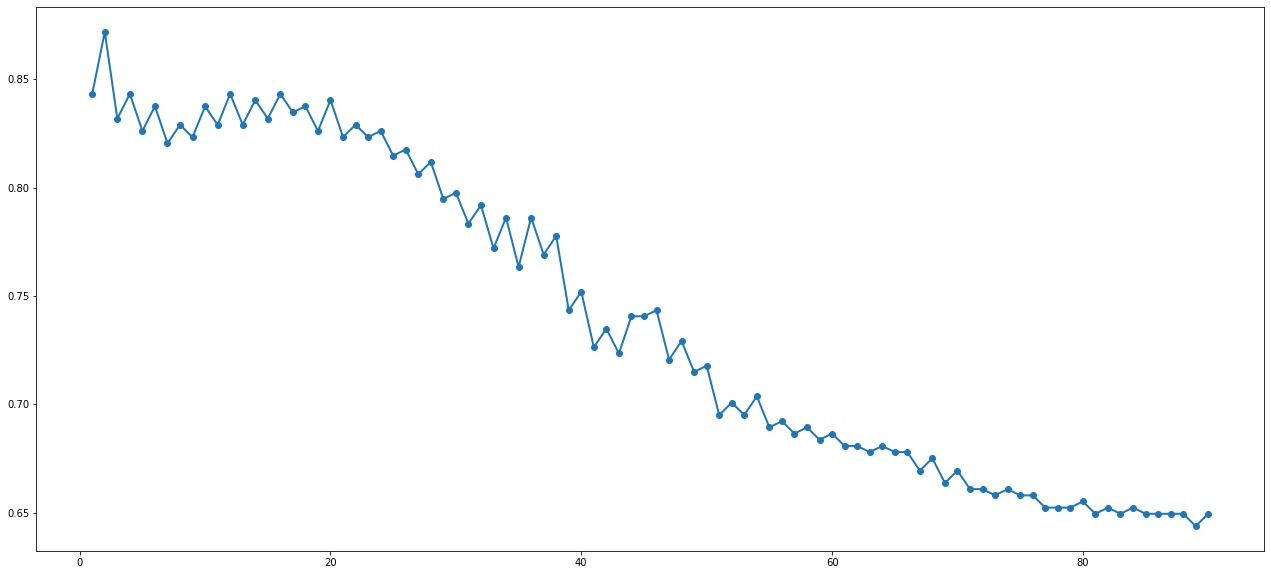

In [36]:
from matplotlib import pyplot as plt
plt.figure(figsize=(22,10))
plt.plot(parameter_values, avg_scores, '-o', linewidth=2, markersize=6)

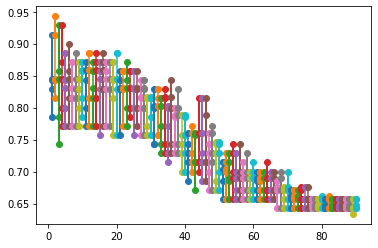

In [37]:
for parameter, scores in zip(parameter_values, all_scores):
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

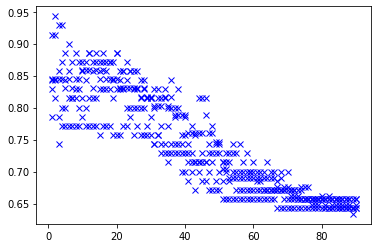

In [38]:
plt.plot(parameter_values, all_scores, 'bx')

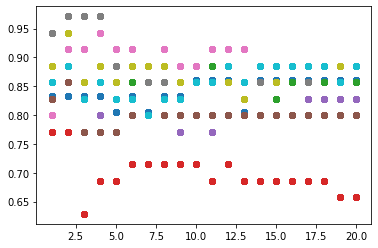

In [39]:
from collections import defaultdict
all_scores = defaultdict(list)
parameter_values = list(range(1, 21))  
for n_neighbors in parameter_values:
    for i in range(100):
        estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
        scores = cross_val_score(estimator, X, y, scoring='accuracy', cv=10)
        all_scores[n_neighbors].append(scores)
for parameter in parameter_values:
    scores = all_scores[parameter]
    n_scores = len(scores)
    plt.plot([parameter] * n_scores, scores, '-o')

In [ ]:
plt.plot(parameter_values, avg_scores, '-o')

In [41]:
X_broken = np.array(X)

In [42]:
X_broken[:,::2] /= 10

In [43]:
estimator = KNeighborsClassifier()
original_scores = cross_val_score(estimator, X, y,
  scoring='accuracy')
print("The original average accuracy for is {0:.1f}%".format(np.mean(original_scores) * 100))
broken_scores = cross_val_score(estimator, X_broken, y,
  scoring='accuracy')
print("The 'broken' average accuracy for is {0:.1f}%".format(np.mean(broken_scores) * 100))


The original average accuracy for is 82.6%
The 'broken' average accuracy for is 73.8%


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
X_transformed = MinMaxScaler().fit_transform(X)

In [46]:
X_transformed = MinMaxScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed, y, scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The average accuracy for is 82.9%


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X_transformed1 = StandardScaler().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed1, y, scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The average accuracy for is 82.9%


In [53]:
from sklearn.preprocessing import Binarizer

In [54]:
X_transformed2 = Binarizer().fit_transform(X)
#X_transformed2 = Binarizer().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed2, y, scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The average accuracy for is 84.6%


In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
X_transformed3 = Normalizer().fit_transform(X_broken)
estimator = KNeighborsClassifier()
transformed_scores = cross_val_score(estimator, X_transformed3, y, scoring='accuracy')
print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The average accuracy for is 81.8%


In [49]:
from sklearn.pipeline import Pipeline

In [50]:
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),('predict', KNeighborsClassifier())])


In [ ]:
scores = cross_val_score(scaling_pipeline, X_broken, y, scoring='accuracy')
print("The pipeline scored an average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))


The pipeline scored an average accuracy for is 82.9%


In [51]:
scores = cross_val_score(scaling_pipeline, X, y, scoring='accuracy')
print("The pipeline scored an average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))

The pipeline scored an average accuracy for is 82.9%
